In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('D://DKIT//dissertation//Dataset_of_Tomato_Leaves//plantvillage//Preprocessed_data//64//vector//')

# RGB data

In [3]:
#reading RGB data
rgb_data = np.load('rgb_data.npy')

In [4]:
#printing the shape of the data
print(rgb_data.shape)

(14531, 12288)


In [5]:
#transforming the data to dataframe
rgb_features = pd.DataFrame(rgb_data)

In [6]:
#describing the data
rgb_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
count,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,...,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000
mean,138.809167,132.239213,135.766774,138.864910,132.229578,135.791274,139.001032,132.273966,135.883972,139.242654,...,131.738697,134.912257,126.304384,131.944188,134.947285,126.265433,132.065171,134.943294,126.231505,132.097929
std,31.509292,30.921788,32.651635,31.293104,30.678034,32.277673,31.218158,30.584018,31.984034,31.210111,...,34.280872,34.387050,32.712633,34.419730,34.443550,32.769292,34.644883,34.666691,33.020825,34.995978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,113.000000,115.000000,120.000000,113.000000,115.000000,121.000000,113.000000,115.000000,121.000000,...,110.000000,115.000000,106.000000,110.000000,115.000000,105.000000,110.000000,115.000000,105.000000,110.000000
50%,139.000000,133.000000,136.000000,139.000000,133.000000,136.000000,139.000000,133.000000,136.000000,139.000000,...,132.000000,137.000000,127.000000,132.000000,137.000000,127.000000,132.000000,136.000000,126.000000,132.000000
75%,158.000000,151.000000,156.000000,158.000000,151.000000,155.000000,158.000000,151.000000,155.000000,158.000000,...,154.000000,157.000000,148.000000,154.000000,157.000000,148.000000,155.000000,158.000000,148.000000,155.000000
max,255.000000,252.000000,255.000000,255.000000,250.000000,255.000000,255.000000,247.000000,252.000000,253.000000,...,255.000000,253.000000,254.000000,255.000000,255.000000,254.000000,255.000000,255.000000,253.000000,255.000000


In [7]:
#scaling the data using standard scaling
scaler_model = StandardScaler()
scaled_data = scaler_model.fit_transform(rgb_features)

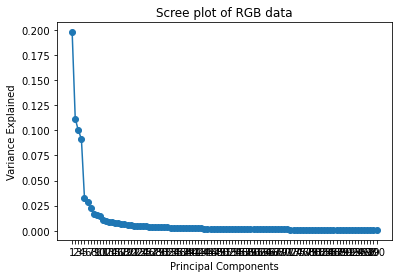

In [8]:
#using 100 components on the data
pca_comp = PCA(n_components = 100)
x_pca_comp = pca_comp.fit_transform(scaled_data)
variances = pca_comp.explained_variance_ratio_
#visualising the scree plot for the PCA
plt.plot(list(range(1,101)),variances, 'o-')
plt.title('Scree plot of RGB data')
plt.xticks(range(1,101))
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.show()

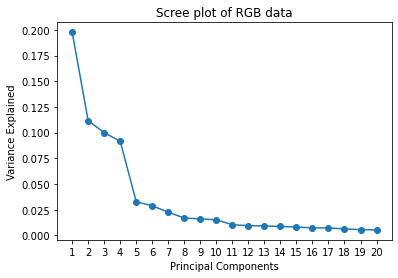

In [9]:
#using 20 components on the data
pca_comp = PCA(n_components = 20)
x_pca_comp = pca_comp.fit_transform(scaled_data)
variances = pca_comp.explained_variance_ratio_
#visualising the scree plot for the PCA
plt.plot(list(range(1,21)),variances, 'o-')
plt.title('Scree plot of RGB data')
plt.xticks(range(1,21))
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.show()

In [10]:
pca_comp = PCA(n_components = 5)
x_pca_comp = pca_comp.fit_transform(scaled_data)
# ICA on PCA data
ica_comp = FastICA(n_components=5,max_iter=100)
ica_rgb = ica_comp.fit_transform(x_pca_comp)

In [11]:
#creating column names
cols = []
for i in range(1,6):
    j = []
    j = 'component_' + str(i)
    cols.append(j)
#saving the data to a Dataframe
rgb = pd.DataFrame(ica_rgb,columns = cols)

# Grayscale data

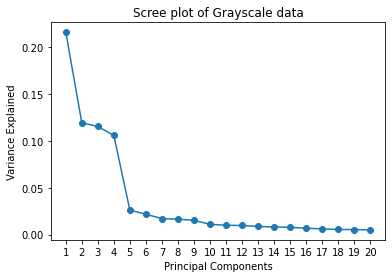

In [12]:
#reading grayscale data
gray_data = np.load('gray_test.npy')
#transforming the data to dataframe
gray_features = pd.DataFrame(gray_data)
#scaling the data using standard scaling
scaled_data = scaler_model.fit_transform(gray_features)
#using 100 components on the data
pca_comp = PCA(n_components = 20)
x_pca_comp = pca_comp.fit_transform(scaled_data)
variances = pca_comp.explained_variance_ratio_
#visualising the scree plot for the PCA
plt.plot(list(range(1,21)),variances, 'o-')
plt.title('Scree plot of Grayscale data')
plt.xticks(range(1,21))
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.show()

In [13]:
pca_comp = PCA(n_components = 5)
x_pca_comp = pca_comp.fit_transform(scaled_data)
# ICA on PCA data
ica_comp = FastICA(n_components=5)
ica_gray = ica_comp.fit_transform(x_pca_comp)

In [14]:
#saving the data to a Dataframe
gray = pd.DataFrame(ica_gray,columns = cols)

# Red channel

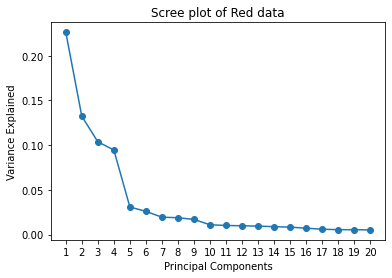

In [15]:
#reading Red data
red_data = np.load('red_data.npy')
#transforming the data to dataframe
red_features = pd.DataFrame(red_data)
#scaling the data using standard scaling
scaled_data = scaler_model.fit_transform(red_features)
#using 100 components on the data
pca_comp = PCA(n_components = 20)
x_pca_comp = pca_comp.fit_transform(scaled_data)
variances = pca_comp.explained_variance_ratio_
#visualising the scree plot for the PCA
plt.plot(list(range(1,21)),variances, 'o-')
plt.title('Scree plot of Red data')
plt.xticks(range(1,21))
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.show()

In [16]:
pca_comp = PCA(n_components = 5)
x_pca_comp = pca_comp.fit_transform(scaled_data)
# ICA on PCA data
ica_comp = FastICA(n_components=5)
ica_red = ica_comp.fit_transform(x_pca_comp)

In [17]:
#saving the data to a Dataframe
red = pd.DataFrame(ica_red,columns = cols)

# Green channel data

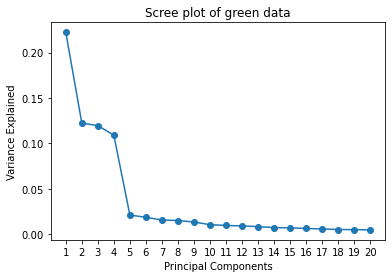

In [18]:
#reading green data
green_data = np.load('green_data.npy')
#transforming the data to dataframe
green_features = pd.DataFrame(green_data)
#scaling the data using standard scaling
scaled_data = scaler_model.fit_transform(green_features)
#using 100 components on the data
pca_comp = PCA(n_components = 20)
x_pca_comp = pca_comp.fit_transform(scaled_data)
variances = pca_comp.explained_variance_ratio_
#visualising the scree plot for the PCA
plt.plot(list(range(1,21)),variances, 'o-')
plt.title('Scree plot of green data')
plt.xticks(range(1,21))
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.show()

In [19]:
pca_comp = PCA(n_components = 5)
x_pca_comp = pca_comp.fit_transform(scaled_data)
# ICA on PCA data
ica_comp = FastICA(n_components=5)
ica_green = ica_comp.fit_transform(x_pca_comp)

In [20]:
#saving the data to a Dataframe
green = pd.DataFrame(ica_green,columns = cols)

# Blue channel data

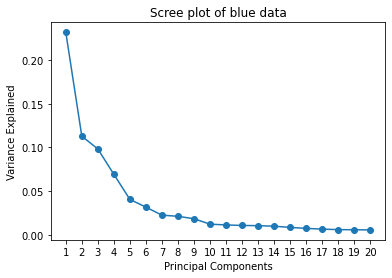

In [21]:
#reading blue data
blue_data = np.load('blue_data.npy')
#transforming the data to dataframe
blue_features = pd.DataFrame(blue_data)
#scaling the data using standard scaling
scaled_data = scaler_model.fit_transform(blue_features)
#using 100 components on the data
pca_comp = PCA(n_components = 20)
x_pca_comp = pca_comp.fit_transform(scaled_data)
variances = pca_comp.explained_variance_ratio_
#visualising the scree plot for the PCA
plt.plot(list(range(1,21)),variances, 'o-')
plt.title('Scree plot of blue data')
plt.xticks(range(1,21))
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.show()

In [22]:
pca_comp = PCA(n_components = 5)
x_pca_comp = pca_comp.fit_transform(scaled_data)
# ICA on PCA data
ica_comp = FastICA(n_components=5)
ica_blue = ica_comp.fit_transform(x_pca_comp)

In [23]:
#saving the data to a Dataframe
blue = pd.DataFrame(ica_blue,columns = cols)

In [24]:
#changing the working directory
os.chdir('D://DKIT//dissertation//Dataset_of_Tomato_Leaves//plantvillage//Preprocessed_data//64//PCA//')
# Saving the data to the local directory
rgb.to_csv('rgb.csv',index=False)
gray.to_csv('gray.csv',index=False)
red.to_csv('red.csv',index=False)
green.to_csv('green.csv',index=False)
blue.to_csv('blue.csv',index=False)